In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [2]:
# def gaussiana(x, sigma, mi):
#     return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - mi)**2/(2*sigma**2)) + 600

def gaussiana(x, sigma, mi, a, H):
    return a*np.exp(-(x - mi)**2/(2*sigma**2)) + H

def gaussiana_fit(dados_x, dados_y):

    media = sum(dados_x*dados_y)/sum(dados_y)
    sigma =np.sqrt(sum(dados_y* (dados_x - media)**2)/sum(dados_y))
    popt, pcov = curve_fit(
    f = gaussiana,
    xdata = dados_x,
    ydata = dados_y,
    p0 = [media, sigma, 1, 1],
    maxfev=100000
)
    return [popt, np.sqrt(np.diag(pcov))]

In [3]:
gauss_kbr = pd.read_csv('./Dados/kbr_30.csv',sep='\s', decimal=',')
gauss_kbr_x = np.array(gauss_kbr['Ângulo'])
gauss_kbr_y = np.array(gauss_kbr['R'])
c = 299792458
h = 4.135668e-15
d = 3.295e-10
gauss_kbr_x_e = 1e-3 * h*c/(2*d*np.sin(gauss_kbr_x * np.pi/180))


C:\Users\victo\AppData\Local\Temp\ipykernel_21740\1310256255.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_kbr = pd.read_csv('./Dados/kbr_30.csv',sep='\s', decimal=',')


Plot

In [4]:
# par = gaussiana_fit(gauss_kbr_x[35:45], gauss_kbr_y[35:45])
# par[1]

In [5]:
par = gaussiana_fit(gauss_kbr_x[35:45], gauss_kbr_y[35:45])
x_model = np.linspace(min(gauss_kbr_x[35:45]), max(gauss_kbr_x[35:45]))  
gaussiana(x_model, par[0][0], par[0][1], par [0][2], par[0][3])



array([359.04753172, 357.8777972 , 356.4881471 , 354.84679445,
       352.91944538, 350.66954496, 348.05863724, 345.04685042,
       341.5935157 , 337.6579247 , 333.20022555, 328.18245305,
       322.56968164, 316.3312837 , 309.44226857, 301.88467084,
       293.64894968, 284.73535502, 275.15521151, 264.93206762,
       254.10265563, 242.71760874, 230.84188435, 218.55484803,
       205.94998041, 193.13417971, 180.22664506, 167.35734007,
       154.6650515 , 142.2950743 , 130.39656994, 119.11966063,
       108.61233495,  99.01725228,  90.46854086,  83.0886893 ,
        76.98563188,  72.2501242 ,  68.95349847,  67.14587592,
        66.85489889,  68.08502751,  70.81742601,  75.01044252,
        80.60066552,  87.50451934,  95.62034261, 104.83087752,
       115.0060847 , 126.00618937])

In [6]:
par[1][0]

0.09126060355173458

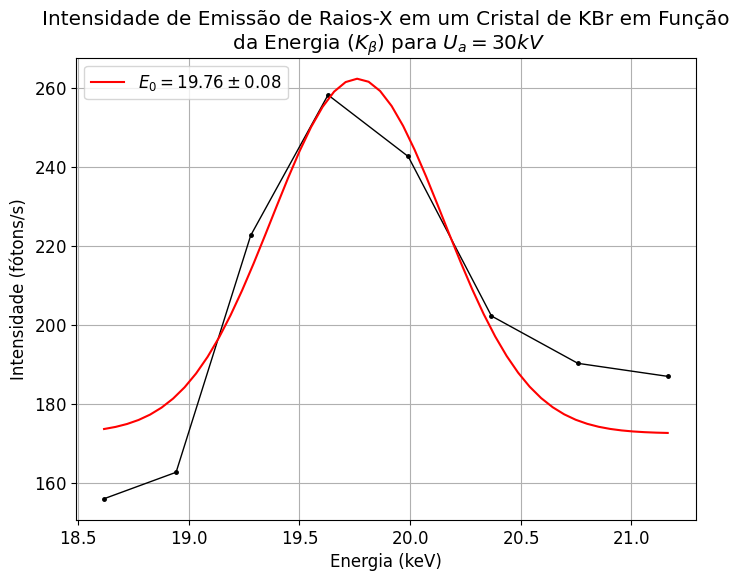

In [7]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$E_0 = {par[0][1]:.4} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_kbr_x_e[26:34], gauss_kbr_y[26:34], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_kbr_x_e[26:34], gauss_kbr_y[26:34], 'red')

# grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de KBr em Função\n da Energia ($K_\\beta$) para $U_a = 30kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr26graus.png')
plt.show()


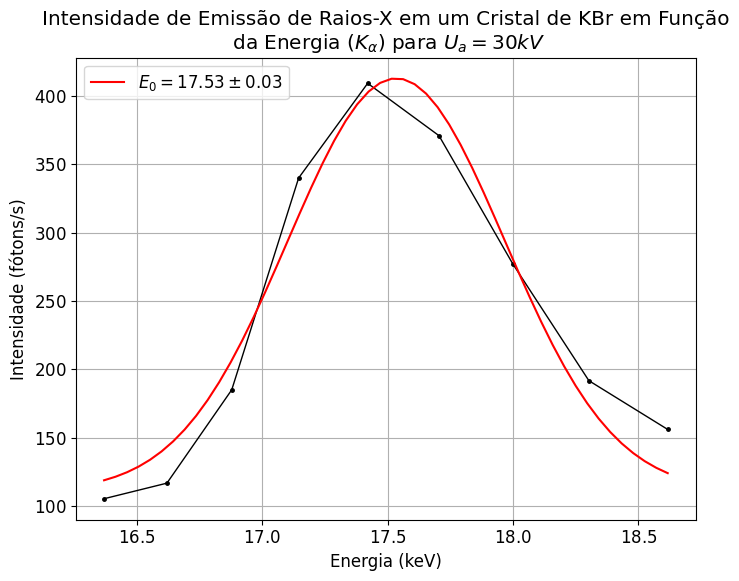

In [8]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$E_0 = {par[0][1]:.4} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_kbr_x_e[33:42], gauss_kbr_y[33:42], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_kbr_x_e[33:42], gauss_kbr_y[33:42], 'red')

#grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de KBr em Função\n da Energia ($K_\\alpha$) para $U_a = 30kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [12]:
i = 2
while gauss_kbr_y[i] < max(gauss_kbr_y)*0.15:
    i += 1
l = 2*d*np.sin(gauss_kbr_x[i+1]*np.pi/180)
h = 10e3*30*l/c
sh = 2*d*10e3*30*(l/c*np.tan(gauss_kbr_x[i+1]*np.pi/180))*gauss_kbr_x[i+1]*np.pi/180
h, sh

(4.140759842245682e-14, 1.078691433565141e-25)

In [10]:
gauss_kbr_x[i]

3.5

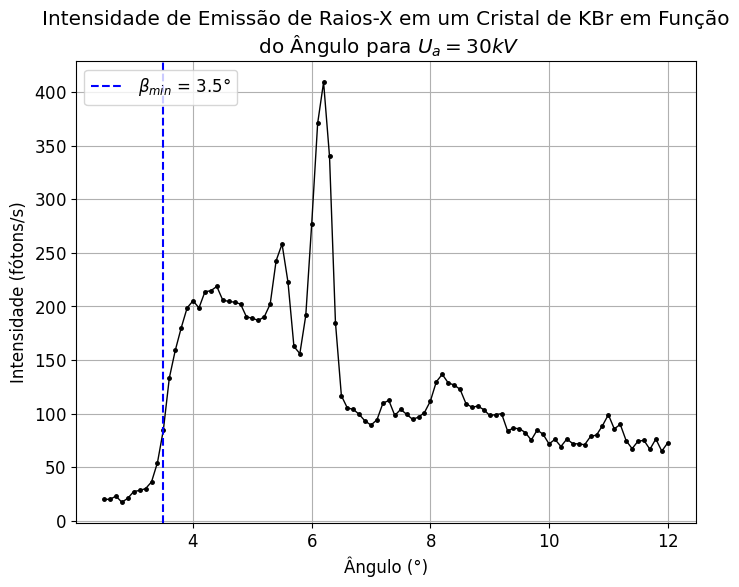

In [11]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

# plot dos pontos:
grafico3 = grafico.plot(gauss_kbr_x, gauss_kbr_y, marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste

grafico.axvline(x = gauss_kbr_x[i], color = 'blue', label = '$\\beta_{min}$ =' + f'{gauss_kbr_x[i]: .2}°', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Ângulo (°)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de KBr em Função\n do Ângulo para $U_a = 30kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()
